In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import balanced_accuracy_score,f1_score, accuracy_score, precision_score, recall_score
import numpy as np
#plot the depth
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_validate
from sklearn.metrics import balanced_accuracy_score,f1_score,precision_score, recall_score


df = pd.read_csv('data/fashion_half.csv', delimiter=',', quotechar='"')
features = df.loc[:,"pixel1":"pixel784"]
labels = df["label"]
#1 for malignant 0 for benign


X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.25)


In [11]:
#change number of estimators
#Boosting_ADABoost
max_n_estimators = range(1, 20, 1)

train_prec = []
test_prec = []

train_recall = []
test_recall = []


cross_val_recall_avg =[]
cross_val_recall_std = []

depths = [2,4,6]
estimators = []


depth_train_acc = []
depth_test_acc = []

depth_cross_val_acc_avg = []
depth_cross_val_acc_std = []

    
for i, o in enumerate(max_n_estimators):
    print ('Boosting dtree with estimators=' + str(o))
    dt = DecisionTreeClassifier(max_depth=1)
    clf = AdaBoostClassifier(base_estimator=dt, n_estimators=o)
    scores_acc =cross_validate(clf, X_train, y_train, cv=3, scoring='accuracy',return_train_score=True,return_estimator=True)

    ind= np.argmax(scores_acc['test_score'])
    estimators.append(scores_acc['estimator'][ind])


    depth_cross_val_acc_std.append(np.std(scores_acc['test_score']))
    depth_cross_val_acc_avg.append(np.average(scores_acc['test_score']))

    est = scores_acc['estimator'][ind]

    depth_train_acc.append(accuracy_score(y_train, est.predict(X_train)))
    depth_test_acc.append(accuracy_score(y_test, est.predict(X_test)))

    #clf.fit(X_train, y_train)



    print(confusion_matrix(y_test, est.predict(X_test)))

        
    #cross_val_recall_avg.append(depth_cross_val_recall_avg)
    #cross_val_recall_std.append(depth_cross_val_recall_std)
    #train_precision.append(depth_train_prec)
    #test_precision.append(depth_test_prec)
    #train_recall.append(depth_train_recall)
    #test_recall.append(depth_test_recall)
    

Boosting dtree with estimators=1
[[1452    0    0    0   26]
 [1479    0    0    0   22]
 [1508    0    0    0    5]
 [1313    0    0    0  177]
 [  49    0    0    0 1469]]
Boosting dtree with estimators=2
[[   0 1292  160    0   26]
 [   0 1438   40    0   23]
 [   0  192 1315    0    6]
 [   0   72 1238    0  180]
 [   0    2   42    0 1474]]
Boosting dtree with estimators=3
[[1287    7  157    3   24]
 [ 230 1217   10   31   13]
 [ 190    2 1308    7    6]
 [  69    3 1218   21  179]
 [   2    0   42    7 1467]]
Boosting dtree with estimators=4
[[1306    9  139   19    5]
 [ 239 1246    9    3    4]
 [ 192    9 1208  100    4]
 [  79    5  182 1055  169]
 [   2    0    5   44 1467]]
Boosting dtree with estimators=5
[[1230   65  163   19    1]
 [  69 1407    9   12    4]
 [ 205   12 1248   47    1]
 [  37   16  279 1067   91]
 [   0    1    0   50 1467]]
Boosting dtree with estimators=6
[[1230   68  131   48    1]
 [  69 1418    9    5    0]
 [ 205   13 1245   50    0]
 [  35   56  

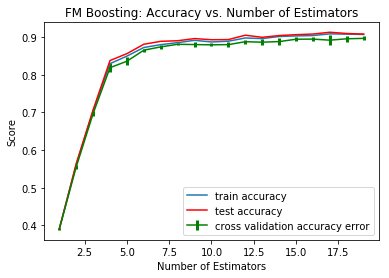

In [12]:
#estimators graph
import matplotlib.pyplot as plt
plt.figure()
plt.title('FM Boosting: Accuracy vs. Number of Estimators')
#plt.ylim((0.9,1))
ps=max_n_estimators 

plt.plot(ps, list(depth_train_acc), '-', label='train accuracy')
plt.errorbar(ps, list(depth_cross_val_acc_avg),yerr=list(depth_cross_val_acc_std), elinewidth=3,linestyle='-', label='cross validation accuracy error', color='green')
plt.plot(ps, list(depth_test_acc),linestyle='-', label='test accuracy ', color='red')


plt.xlabel("Number of Estimators")
plt.ylabel("Score")

plt.savefig('plots/depth_precision_recall_breastCancer')
plt.legend()
plt.show()

In [27]:
#depths of decision tree
#Boosting_ADABoost
max_n_estimators = range(1, 20, 1)



depths = range(1, 11, 1)
estimators = []


depth_train_acc = []
depth_test_acc = []

depth_cross_val_acc_avg = []
depth_cross_val_acc_std = []

    
for i, o in enumerate(depths):
    print ('Boosting dtree with estimators=' + str(o))
    dt = DecisionTreeClassifier(max_depth=o)
    clf = AdaBoostClassifier(base_estimator=dt, n_estimators=15)
    scores_acc =cross_validate(clf, X_train, y_train, cv=3, scoring='accuracy',return_train_score=True,return_estimator=True)

    ind= np.argmax(scores_acc['test_score'])
    estimators.append(scores_acc['estimator'][ind])


    depth_cross_val_acc_std.append(np.std(scores_acc['test_score']))
    depth_cross_val_acc_avg.append(np.average(scores_acc['test_score']))

    est = scores_acc['estimator'][ind]

    depth_train_acc.append(accuracy_score(y_train, est.predict(X_train)))
    depth_test_acc.append(accuracy_score(y_test, est.predict(X_test)))

    #clf.fit(X_train, y_train)



    print(confusion_matrix(y_test, est.predict(X_test)))

        
    #cross_val_recall_avg.append(depth_cross_val_recall_avg)
    #cross_val_recall_std.append(depth_cross_val_recall_std)
    #train_precision.append(depth_train_prec)
    #test_precision.append(depth_test_prec)
    #train_recall.append(depth_train_recall)
    #test_recall.append(depth_test_recall)
    

Boosting dtree with estimators=1
[[1263   94   85   36    0]
 [  80 1404    8    2    7]
 [ 182   26 1286   19    0]
 [  69    9   37 1369    6]
 [   1    0    0   42 1475]]
Boosting dtree with estimators=2
[[1342   31   70   35    0]
 [  57 1423   14    7    0]
 [  48   22 1417   26    0]
 [  47    7   33 1403    0]
 [   2    0    0   10 1506]]
Boosting dtree with estimators=3
[[1301   39   72   66    0]
 [  38 1417   38    8    0]
 [  44   15 1421   33    0]
 [  25    6   69 1390    0]
 [   0    0    0   32 1486]]
Boosting dtree with estimators=4
[[1335   26   96   21    0]
 [  39 1421   38    3    0]
 [  63    8 1422   20    0]
 [  24    2   29 1433    2]
 [   2    0    0   24 1492]]
Boosting dtree with estimators=5
[[1386   18   48   26    0]
 [  27 1454   18    2    0]
 [  59    4 1424   26    0]
 [  21    3   28 1437    1]
 [   0    0    0    6 1512]]
Boosting dtree with estimators=6
[[1399   10   53   16    0]
 [  22 1459   14    6    0]
 [  38    8 1448   19    0]
 [  25    3  

In [28]:
app = range(11, 16, 1)
for i, o in enumerate(app):
    print ('Boosting dtree with estimators=' + str(o))
    dt = DecisionTreeClassifier(max_depth=o)
    clf = AdaBoostClassifier(base_estimator=dt, n_estimators=15)
    scores_acc =cross_validate(clf, X_train, y_train, cv=3, scoring='accuracy',return_train_score=True,return_estimator=True)

    ind= np.argmax(scores_acc['test_score'])
    estimators.append(scores_acc['estimator'][ind])


    depth_cross_val_acc_std.append(np.std(scores_acc['test_score']))
    depth_cross_val_acc_avg.append(np.average(scores_acc['test_score']))

    est = scores_acc['estimator'][ind]

    depth_train_acc.append(accuracy_score(y_train, est.predict(X_train)))
    depth_test_acc.append(accuracy_score(y_test, est.predict(X_test)))

    #clf.fit(X_train, y_train)



    print(confusion_matrix(y_test, est.predict(X_test)))

Boosting dtree with estimators=11
[[1435    7   22   14    0]
 [  19 1473    8    1    0]
 [  14    5 1484   10    0]
 [  13    1   12 1463    1]
 [   1    0    0    6 1511]]
Boosting dtree with estimators=12
[[1421    6   25   26    0]
 [  15 1476   10    0    0]
 [  25   10 1469    9    0]
 [  10    0   13 1466    1]
 [   0    0    0    5 1513]]
Boosting dtree with estimators=13
[[1425    5   29   18    1]
 [  15 1477    8    1    0]
 [  23    8 1471   11    0]
 [  15    1   14 1459    1]
 [   0    0    0    6 1512]]
Boosting dtree with estimators=14
[[1425    7   28   18    0]
 [  21 1470    6    4    0]
 [  18    9 1477    9    0]
 [  14    1   16 1459    0]
 [   0    0    1    4 1513]]
Boosting dtree with estimators=15
[[1426    5   29   18    0]
 [  21 1472    8    0    0]
 [  21    5 1474   13    0]
 [  12    2   18 1457    1]
 [   1    0    0    5 1512]]


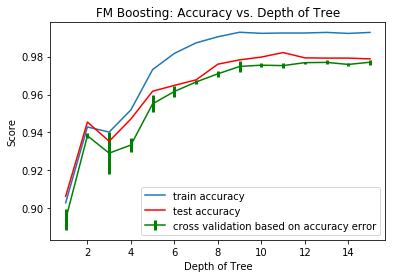

In [29]:
#depth tree graph 
import matplotlib.pyplot as plt
plt.figure()
plt.title('FM Boosting: Accuracy vs. Depth of Tree')
#plt.ylim((0.9,1))
ps=range(1,16,1)

plt.plot(ps, list(depth_train_acc), '-', label='train accuracy')
plt.errorbar(ps, list(depth_cross_val_acc_avg),yerr=list(depth_cross_val_acc_std), elinewidth=3,linestyle='-', label='cross validation based on accuracy error', color='green')
plt.plot(ps, list(depth_test_acc),linestyle='-', label='test accuracy ', color='red')


plt.xlabel("Depth of Tree")
plt.ylabel("Score")

plt.savefig('plots/depth_precision_recall_breastCancer')
plt.legend()
plt.show()

In [8]:
depth_test_acc

[0.9062666666666667,
 0.9454666666666667,
 0.9354666666666667,
 0.9472,
 0.9616,
 0.9661333333333333,
 0.9732,
 0.9737333333333333,
 0.9765333333333334,
 0.9781333333333333,
 0.9812,
 0.98,
 0.9792,
 0.9792,
 0.9801333333333333]

In [9]:
depth_train_acc

[0.9028888888888889,
 0.9428888888888889,
 0.9401333333333334,
 0.9518666666666666,
 0.9700444444444445,
 0.9819111111111111,
 0.9885333333333334,
 0.9904,
 0.9919111111111111,
 0.9923555555555555,
 0.9930666666666667,
 0.9928888888888889,
 0.9922666666666666,
 0.9926666666666667,
 0.9926222222222222]

In [31]:
#training set size
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import balanced_accuracy_score,f1_score, accuracy_score, precision_score, recall_score
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
from sklearn.metrics import balanced_accuracy_score,f1_score,precision_score, recall_score


#X_train, X_test, y_train, y_test = train_test_split(features, binary_labels, test_size=0.25)


#kNN
portions = range(10, 101, 10)

depth_train_acc = []
depth_test_acc = []

depth_cross_val_acc_avg = []
depth_cross_val_acc_std = []


    
for i, o in enumerate(portions):
    
    end = int(len(X_train)* o/100.0)
    print (end)
    dt = DecisionTreeClassifier(max_depth=10)
    clf = AdaBoostClassifier(base_estimator=dt, n_estimators=15)
    scores_acc =cross_validate(clf, X_train[:end], y_train[:end], cv=3, scoring='accuracy',return_train_score=True,return_estimator=True)

    ind= np.argmax(scores_acc['test_score'])
    estimators.append(scores_acc['estimator'][ind])


    depth_cross_val_acc_std.append(np.std(scores_acc['test_score']))
    depth_cross_val_acc_avg.append(np.average(scores_acc['test_score']))

    est = scores_acc['estimator'][ind]

    depth_train_acc.append(accuracy_score(y_train[:end], est.predict(X_train[:end])))
    depth_test_acc.append(accuracy_score(y_test, est.predict(X_test)))

    print(confusion_matrix(y_test, est.predict(X_test)))



2250
[[1407    9   31   29    2]
 [  20 1462   18    1    0]
 [  34    9 1455   15    0]
 [  13    3   16 1454    4]
 [   2    0    0   14 1502]]
4500
[[1404   14   32   28    0]
 [  22 1467    7    5    0]
 [  27   10 1465   11    0]
 [  11    3   15 1459    2]
 [   0    1    1   10 1506]]
6750
[[1411    7   36   24    0]
 [  20 1466   11    4    0]
 [  29    6 1465   13    0]
 [  16    2   14 1457    1]
 [   0    0    0   10 1508]]
9000
[[1412    8   36   22    0]
 [  23 1463   15    0    0]
 [  39    6 1460    8    0]
 [  13    1   21 1455    0]
 [   2    2    1    6 1507]]
11250
[[1434    7   15   22    0]
 [  23 1464   11    3    0]
 [  35   10 1455   13    0]
 [  10    1   16 1463    0]
 [   0    1    1    7 1509]]
13500
[[1424   10   28   16    0]
 [  19 1468   12    2    0]
 [  26    7 1471    9    0]
 [   8    1   17 1464    0]
 [   0    0    0    7 1511]]
15750
[[1428    8   21   21    0]
 [  21 1469   10    1    0]
 [  28    5 1467   13    0]
 [  11    1   16 1461    1]
 [  

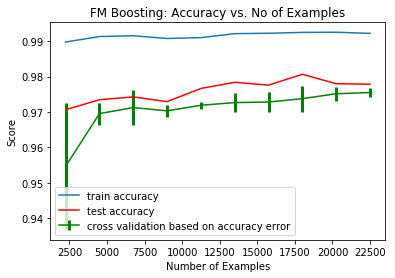

In [32]:
#depth tree graph 
import matplotlib.pyplot as plt
plt.figure()
plt.title('FM Boosting: Accuracy vs. No of Examples')
#plt.ylim((0.9,1))
ps=[int(len(X_train)* p/100.0) for p in portions]

plt.plot(ps, list(depth_train_acc), '-', label='train accuracy')
plt.errorbar(ps, list(depth_cross_val_acc_avg),yerr=list(depth_cross_val_acc_std), elinewidth=3,linestyle='-', label='cross validation based on accuracy error', color='green')
plt.plot(ps, list(depth_test_acc),linestyle='-', label='test accuracy ', color='red')


plt.xlabel("Number of Examples")
plt.ylabel("Score")

plt.savefig('plots/depth_precision_recall_breastCancer')
plt.legend()
plt.show()

In [34]:
depth_test_acc

[0.9706666666666667,
 0.9734666666666667,
 0.9742666666666666,
 0.9729333333333333,
 0.9766666666666667,
 0.9784,
 0.9776,
 0.9806666666666667,
 0.978,
 0.9778666666666667]

In [24]:
ps

[2250, 4500, 6750, 9000, 11250, 13500, 15750, 18000, 20250, 22500]